In [1]:
#Plotting tweets mentioning Trump, Clinton, and Sanders

In [4]:
#Python has a variety of visualization libraries, including seaborn, networkx, and vispy. 
#We'll be working with a dataset of approximately 240,000 tweets about Hillary Clinton, Donald Trump, and Bernie Sanders,
#all current candidates for president of the United States.
import pandas as pd
tweets=pd.read_csv("C:/Users/hp/Desktop/tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,7.298280e+17,Wheeling WV,22330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,7.298280e+17,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,7.298280e+17,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,7.298280e+17,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,7.298280e+17,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [5]:
#id — the id of the row in the database (this isn't important).
#id_str — the id of the tweet on Twitter.
#user_location — the location the tweeter specified in their Twitter bio.
#user_bg_color — the background color of the tweeter's profile.
#user_name — the Twitter username of the tweeter.
#polarity — the sentiment of the tweet, from -1, to 1. 1 indicates strong positivity, -1 strong negativity.
#created — when the tweet was sent.
#user_description — the description the tweeter specified in their bio.
#user_created — when the tweeter created their account.
#user_follower — the number of followers the tweeter has.
#text — the text of the tweet.
#subjectivity — the subjectivity or objectivity of the tweet. 0 is very objective, 1 is very subjective.

In [12]:
#Generating a candidates column
#we can comparing the tweets about one candidate to the tweets about another candidate. 
#For example, we could compare how objective tweets about Donald Trump are to how objective tweets about Bernie Sanders are.

#In order to accomplish this, we first need to generate a column that tells us what candidates are mentioned in each tweet.
#Create a function that finds what candidate names occur in a piece of text.
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)
#Use the apply method on DataFrames to generate a new column called candidate that contains what candidate(s) the tweet mentions.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

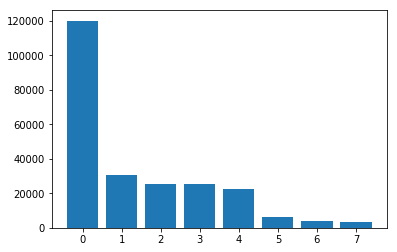

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [15]:
#Use the value_counts method on Pandas Series to count up how many tweets mention each candidate.
#Use plt.bar to create a bar plot. We'll pass in a list of numbers from 0 to the number of unique values in the candidate column 
#as the x-axis input, and the counts as the y-axis input.
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

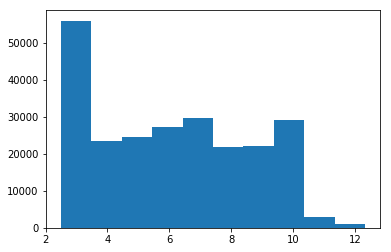

In [16]:
#It's pretty surprising how many more tweets are about Trump than are about Sanders or Clinton!
#One of the things we can look at is the age of the user accounts that are tweeting.
#One candidate having more user accounts created recently might imply some kind of manipulation of Twitter with fake accounts.
#Convert the created and user_created columns to the Pandas datetime type.
#Create a user_age column that is the number of days since the account was created.
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

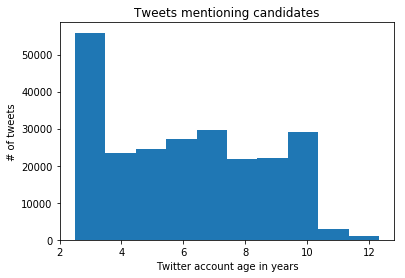

In [17]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


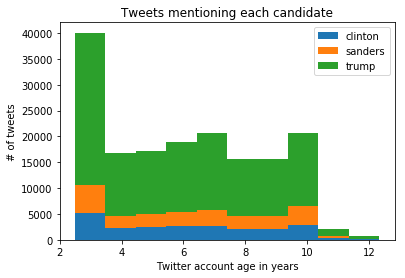

In [18]:
#stacked histogram
#Generate three Pandas series, each containing the user_age data only for tweets about a certain candidate.
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


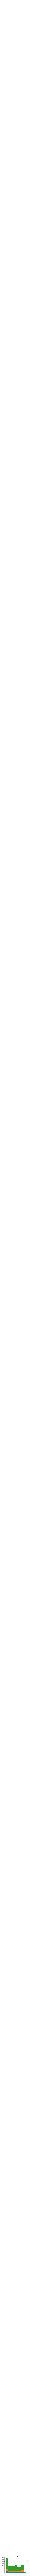

In [20]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

In [21]:
#Multiple subplots
#plt.subplots(nrows=2, ncols=2) will generate 2x2 grid of Axes objects. plt.subplots(nrows=2, ncols=1) 
#will generate a 2x1 grid of Axes objects,and stack the two Axes vertically.

In [29]:
#TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for 
#diving into common natural language processing (NLP) tasks such as part-of-speech tagging, 
#noun phrase extraction, sentiment analysis, classification, translation, and more.

In [38]:
from textblob import TextBlob

In [44]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [50]:
text = "The titular threat of The Blob has always struck me as the ultimate movie "

blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.05, subjectivity=0.55)


In [ ]:
import nltk#NLTK(natural language toolkit) is a leading platform for building Python programs to work with human language data. 
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite
#of text processing libraries for classification, tokenization, stemming, tagging, parsing, 
#and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
nltk.download()

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[0:6]

In [ ]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

In [ ]:
#We can plot the mean value for each candidate, along with the standard deviation. 
#The standard deviation will tell us how wide the variation is between all the tweets, 
#whereas the mean will tell us how the average tweet is.

#Group tweets by candidate, and compute the mean and standard deviation for each numerical column (including polarity).
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()